## Aula 2
### Álgebra Linear para Ciência de Dados

**Aluno:** Daniel Serezane

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as io
import seaborn as sns
#from tqdm import tqdm

#### Exercício com imagem

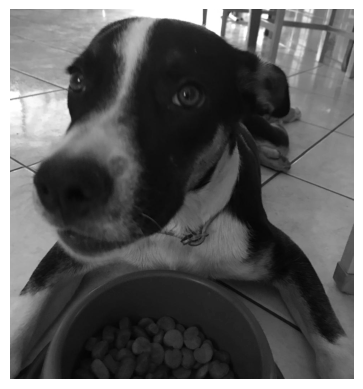

In [4]:
# carregando imagem em branco e preto para evitar o surgimento de um tensor RGB
im = Image.open('../data/bidu.jpeg').convert('L')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [5]:
# convertendo imagem em array
im_arr = np.array(im)
print(im_arr.shape)

(1034, 960)


In [6]:
# aplicando o svd
U, S, Vh = np.linalg.svd(im_arr, full_matrices=True)
S = np.diag(S)
U.shape, S.shape, Vh.shape

((1034, 1034), (960, 960), (960, 960))

In [7]:
# função para gerar aproximação dado um rank
def approx_for_r(r):
    return U[:, :r] @ S[:r, :r] @ Vh[:r, :]

In [8]:
# gerando as aproximações
r_to_test = [1, 5, 10, 50, 100] # para cada um desses r
labels = ['Original']
labels += [f'r = {r}' for r in r_to_test]
results = [im_arr]
for r in r_to_test:
    results.append(approx_for_r(r))

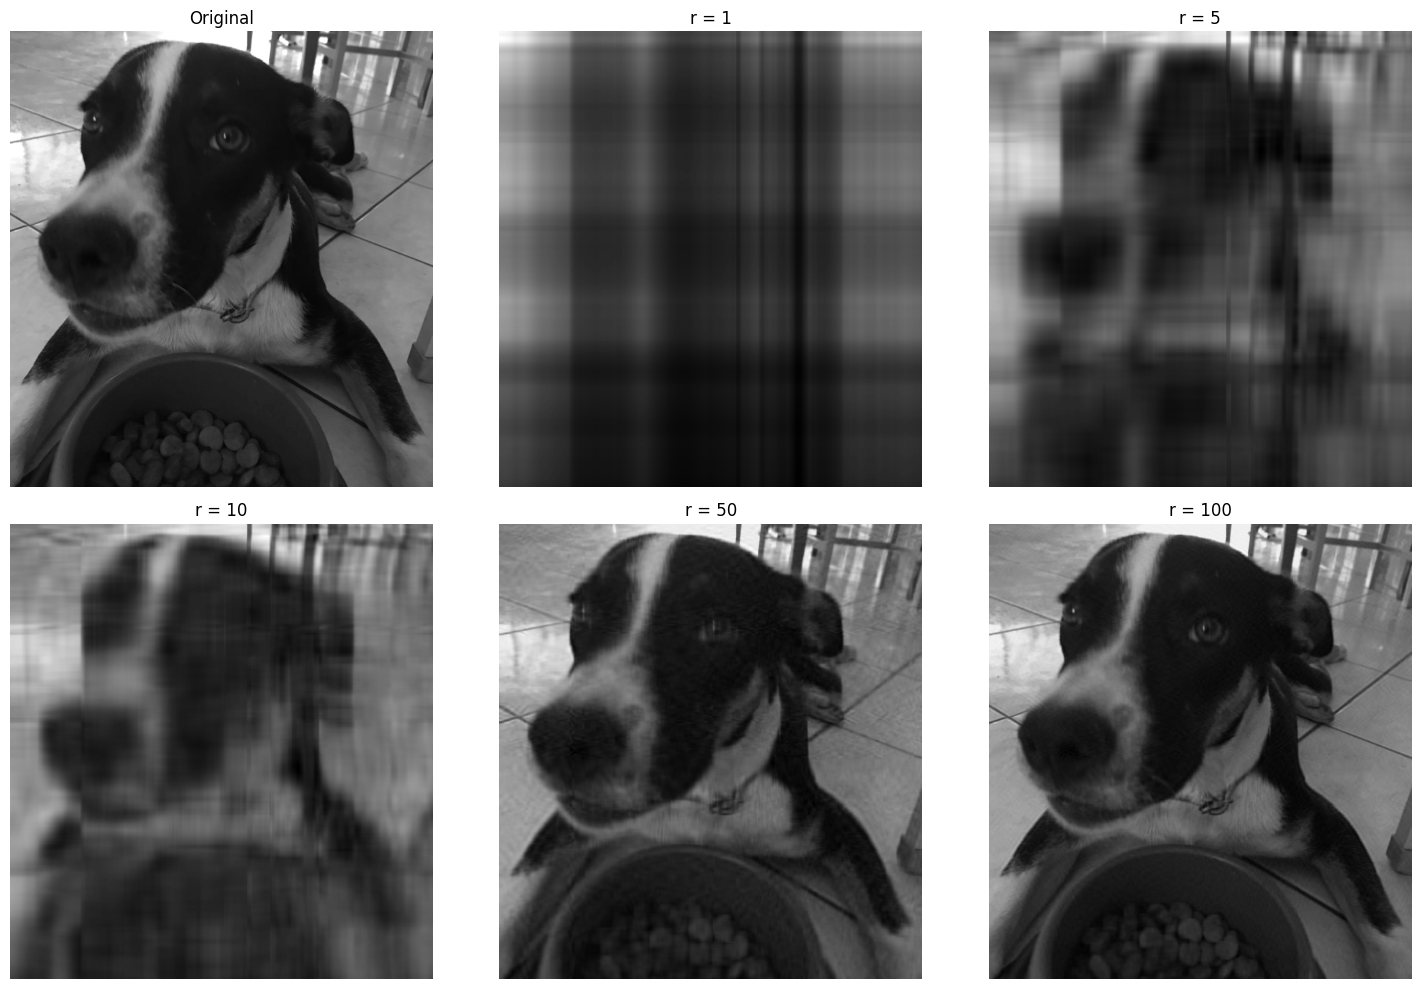

In [9]:
# plotando as aproximações
# grid 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axs.flat):
    ax.imshow(results[i], cmap='gray')
    ax.axis('off')
    ax.set_title(labels[i])
plt.tight_layout()
plt.show()

### Exercício com dados de filmes e pessoas

In [10]:
df_mov = pd.read_csv('data/movie_user_data.csv')
df_mov.head()

Movie  User1  User2  User3  User4  User5  User6  User7  \
0         The Machinist    4.5    6.0    4.0    7.5    2.0    7.5    4.5   
1       Special Chabbis    2.0    7.0    3.0    8.5    5.0    7.0    6.5   
2  Pink Floyd: The Wall    5.0    5.5    2.5    3.0    3.5    5.5    4.5   
3          Training Day    5.5    3.5    3.0    4.0    8.5    1.0    5.5   
4        Ford v Ferrari    1.0    6.5    3.5    5.0    8.5    3.0    6.0   

   User8  User9  ...  User91  User92  User93  User94  User95  User96  User97  \
0    6.0    8.0  ...     5.0     7.0     7.5     3.5     4.0     5.5     7.5   
1    4.0    5.0  ...     7.0     3.0     5.0     5.0     5.0     3.0     7.5   
2    6.5    6.5  ...     7.0     5.0     3.5     6.5     7.5     6.0     5.0   
3    5.5    5.5  ...     4.5     5.5     3.5     5.5     6.5     4.0     6.5   
4    4.5    6.5  ...     3.5     3.5     7.0     7.5     8.5     3.5     0.5   

   User98  User99  User100  
0     5.0     2.5      3.5  
1     7.0     6.5      4.5  
2     3.5     4.5      5.0  
3     8.0     7.0      2.5  
4     3.5     8.0      1.0  

[5 rows x 101 columns]

In [11]:
# transformando em matriz
df_mov_mat = df_mov.drop('Movie', axis=1).values
df_mov_mat

array([[4.5, 6. , 4. , ..., 5. , 2.5, 3.5],
       [2. , 7. , 3. , ..., 7. , 6.5, 4.5],
       [5. , 5.5, 2.5, ..., 3.5, 4.5, 5. ],
       ...,
       [7.5, 5. , 4.5, ..., 1.5, 6. , 7. ],
       [8. , 6. , 5. , ..., 5.5, 6. , 6. ],
       [6.5, 8. , 5.5, ..., 3. , 7. , 5.5]])

In [12]:
U_mov, S_mov, Vh_mov = np.linalg.svd(df_mov_mat, full_matrices=True)
S_mov = np.diag(S_mov)
U_mov.shape, S_mov.shape, Vh_mov.shape

((100, 100), (100, 100), (100, 100))

### Tarefa adicional

##### Exercício 1.1
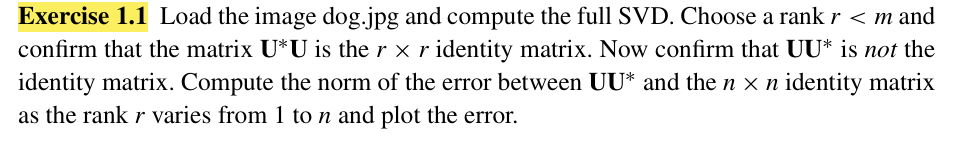

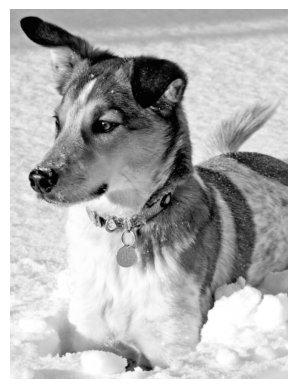

In [13]:
im_dog = Image.open('data/dog.jpg').convert('L')
plt.imshow(im_dog, cmap='gray')
plt.axis('off')
plt.show()

In [14]:
im_dog_arr = np.array(im_dog)
U_dog, S_dog, Vh_dog = np.linalg.svd(im_dog_arr, full_matrices=True)

In [15]:
n, m = im_dog_arr.shape
n, m

(2000, 1500)

In [16]:
# escolhendo r
r = 100

In [17]:
Ur_dog, Sr_dog, Vhr_dog = U_dog[:, :r], np.diag(S_dog[:r]), Vh_dog[:r, :]
Ur_dog.shape, Sr_dog.shape, Vhr_dog.shape

((2000, 100), (100, 100), (100, 1500))

In [18]:
ur_dog_mul = Ur_dog.T @ Ur_dog
# arredondando valores muito baixos para 0
ur_dog_mul = np.where(np.abs(ur_dog_mul) < 1e-10, 0, ur_dog_mul)
print('Ur.T @ Ur = \n', ur_dog_mul, '\n')
print('É identidade?', np.allclose(ur_dog_mul, np.eye(r)))

Ur.T @ Ur = 
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] 

É identidade? True


In [19]:
ur_dog_mul2 = Ur_dog @ Ur_dog.T
ur_dog_mul2 = np.where(np.abs(ur_dog_mul2) < 1e-10, 0, ur_dog_mul2)
print('Ur @ Ur.T = \n', ur_dog_mul2, '\n')
print('É identidade?', np.allclose(ur_dog_mul2, np.eye(n)))

Ur @ Ur.T = 
 [[0.00481798 0.00447987 0.00431599 ... 0.00372829 0.00402688 0.00414704]
 [0.00447987 0.00443985 0.00429115 ... 0.00359659 0.00391658 0.00407284]
 [0.00431599 0.00429115 0.00446669 ... 0.00376707 0.00401637 0.00423384]
 ...
 [0.00372829 0.00359659 0.00376707 ... 0.0137553  0.01350329 0.01280614]
 [0.00402688 0.00391658 0.00401637 ... 0.01350329 0.01422057 0.01364945]
 [0.00414704 0.00407284 0.00423384 ... 0.01280614 0.01364945 0.01347954]] 

É identidade? False


In [20]:
n_id_dog = np.eye(n)

In [21]:
'''err_res = np.zeros(n)
for i in tqdm(range(1, n + 1)):
    Ur_dog_i, Sr_dog_i, Vhr_dog_i = U_dog[:, :i], np.diag(S_dog[:i]), Vh_dog[:i, :]
    UUt = Ur_dog_i @ Ur_dog_i.T
    UUt = np.where(np.abs(UUt) < 1e-10, 0, UUt)
    err_res[i - 1] = np.linalg.norm(n_id_dog - UUt)
# salvando resultados
np.save('out/ex1_err.npy', err_res)'''

"err_res = np.zeros(n)\nfor i in tqdm(range(1, n + 1)):\n    Ur_dog_i, Sr_dog_i, Vhr_dog_i = U_dog[:, :i], np.diag(S_dog[:i]), Vh_dog[:i, :]\n    UUt = Ur_dog_i @ Ur_dog_i.T\n    UUt = np.where(np.abs(UUt) < 1e-10, 0, UUt)\n    err_res[i - 1] = np.linalg.norm(n_id_dog - UUt)\n# salvando resultados\nnp.save('out/ex1_err.npy', err_res)"

In [22]:
err_res = np.load('out/ex1_err.npy')
err_res

array([4.47101778e+01, 4.46989933e+01, 4.46878059e+01, ...,
       1.41421356e+00, 1.00000000e+00, 1.43867084e-14])

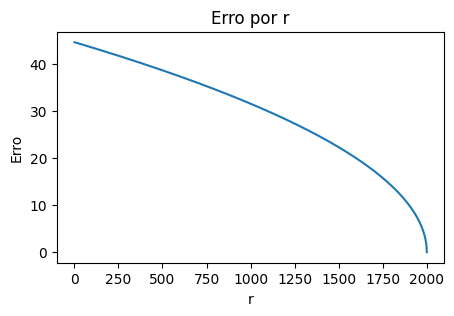

In [23]:
# plot
plt.figure(figsize=(5, 3))
plt.plot(range(1, n + 1), err_res)
plt.xlabel('r')
plt.ylabel('Erro')
plt.title('Erro por r')
plt.show()

##### Exercício 1.2
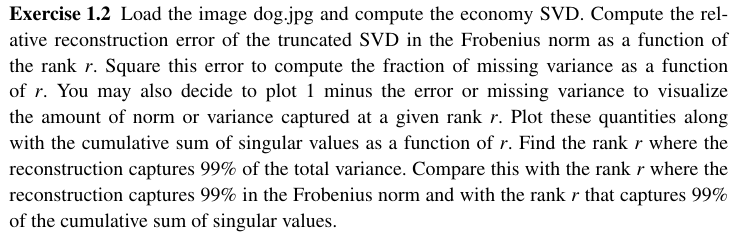

~~"economy SVD" = SVD truncado~~
([fonte](https://www.youtube.com/watch?v=rs63fnUWJkk))

economy SVD é o SVD normal

full SVD é o SVD com a matriz $\Sigma$ completa (0s abaixo da diagonal principal)

In [24]:
U_dog_eco, S_dog_eco, Vh_dog_eco = np.linalg.svd(im_dog_arr, full_matrices=False)

In [25]:
'''"compute the relative reconstruction error of the truncated SVD 
in the Frobenius norm as a function of the rank r'''
def construct_err(r):
    Ur_dog_eco, Sr_dog_eco, Vhr_dog_eco = U_dog_eco[:, :r], np.diag(S_dog_eco[:r]), Vh_dog_eco[:r, :]
    recon = Ur_dog_eco @ Sr_dog_eco @ Vhr_dog_eco
    err = np.linalg.norm(im_dog_arr - recon) / np.linalg.norm(im_dog_arr)
    missing_var = im_dog_arr.var() - recon.var()
    return err, missing_var

In [26]:
'''eco_dog_errors, eco_dog_miss_var = [construct_err(r) for r in tqdm(range(1, n + 1))]
eco_dog_errors = np.array(eco_dog_errors)
eco_dog_miss_var = np.array(eco_dog_miss_var)
np.save('out/ex2_err.npy', eco_dog_errors)
np.save('out/ex2_var.npy', eco_dog_miss_var)'''

"eco_dog_errors = [construct_err(r) for r in tqdm(range(1, n + 1))]\neco_dog_errors = np.array(eco_dog_errors)\nnp.save('out/ex2_err.npy', eco_dog_errors)"

In [27]:
eco_dog_errors = np.load('out/ex2_err.npy')
eco_dog_miss_var = np.load('out/ex2_var.npy')
eco_dog_errors, eco_dog_miss_var

array([3.05870343e-01, 2.40518803e-01, 1.91977322e-01, ...,
       2.14688087e-15, 2.14688087e-15, 2.14688087e-15])

In [28]:
# TODO: var = (expected - mean) ** 2
captured_var = 1 - eco_dog_miss_var
cumsum_singvals = np.cumsum(S_dog_eco) / np.sum(S_dog_eco)

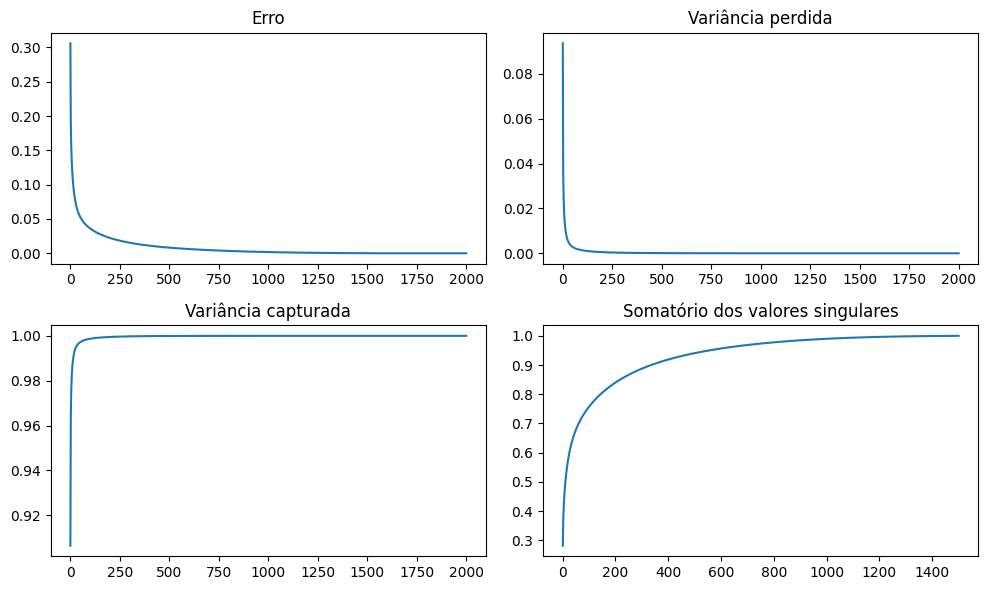

In [29]:
# plot eco_dog_errors, eco_do_miss_var, captured_var, cumsum_singvals
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs = axs.flat
axs[0].plot(range(1, n + 1), eco_dog_errors)
axs[0].set_title('Erro')
axs[1].plot(range(1, n + 1), eco_dog_miss_var)
axs[1].set_title('Variância perdida')
axs[2].plot(range(1, n + 1), captured_var)
axs[2].set_title('Variância capturada')
axs[3].plot(range(1, len(S_dog_eco) + 1), cumsum_singvals)
axs[3].set_title('Somatório dos valores singulares')
plt.tight_layout()
plt.show()

In [30]:
# "find the rank r where the reconstruction captures 99% of the total variance"
r_99_total_var = np.argmax(captured_var >= 0.99 * captured_var[-1]) + 1
print(f'r = {r_99_total_var} captura 99% da variância total')

r = 16 captura 99% da variância total


In [31]:
# Compare this with the rank r where the reconstruction captures 99% in the Frobenius norm
eco_dog_errors_pct = eco_dog_errors * 100
r_99_frob_norm = np.argmax(eco_dog_errors_pct <= 0.99) + 1
print(f'r = {r_99_frob_norm} captura 99%, de acordo com norma de Frobenius')

r = 437 captura 99%, de acordo com norma de Frobenius


In [32]:
# and with the rank r that captures 99% of the cumulative sum of singular values
r_99_cumsum_singvals = np.argmax(cumsum_singvals >= 0.99 * cumsum_singvals[-1]) + 1
print(f'r = {r_99_cumsum_singvals} captura 99% do somatório dos valores singulares')

r = 1003 captura 99% do somatório dos valores singulares


##### Exercício 1.3
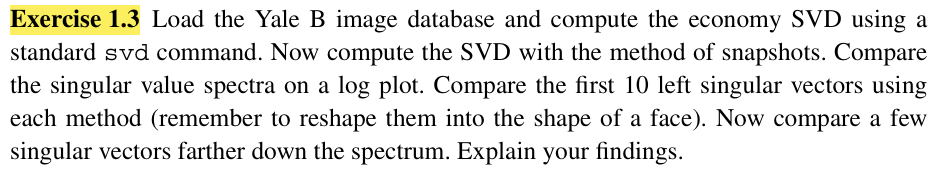

In [33]:
yaleb = io.loadmat('../data/allFaces.mat')
yaleb.keys()

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])

In [34]:
yaleb_faces = yaleb['faces']
yaleb_faces.shape

(32256, 2410)

In [118]:
m = int(yaleb['m'])
n = int(yaleb['n'])
nfaces = yaleb['nfaces'].flatten()
m, n

C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2122471472.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(yaleb['m'])
C:\Users\danie\AppData\Local\Temp\ipykernel_13876\2122471472.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(yaleb['n'])


(168, 192)

In [35]:
U_yale, s_yale, Vh_yale = np.linalg.svd(yaleb_faces, full_matrices=False)

In [64]:
yaleb_faces.shape

(32256, 2410)

In [164]:
def snapshots_svd(X):
    # matriz de covariância (X.T @ X muito lento)
    C = np.cov(X, rowvar=False)
    print(C.shape)
    # autovalores e autovetores
    eigvals, V = np.linalg.eigh(C)
    # ordenando
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    V = V[:, idx]

    S = np.sqrt(eigvals)

    U = X @ V
    U = U / S

    return U, S, V.T

In [165]:
U_yale_snap, s_yale_snap, Vh_yale_snap = snapshots_svd(yaleb_faces)

(2410, 2410)


Vemos que o shape é (2410, 2410), ou seja, de fato calculamos a matriz reduzida.

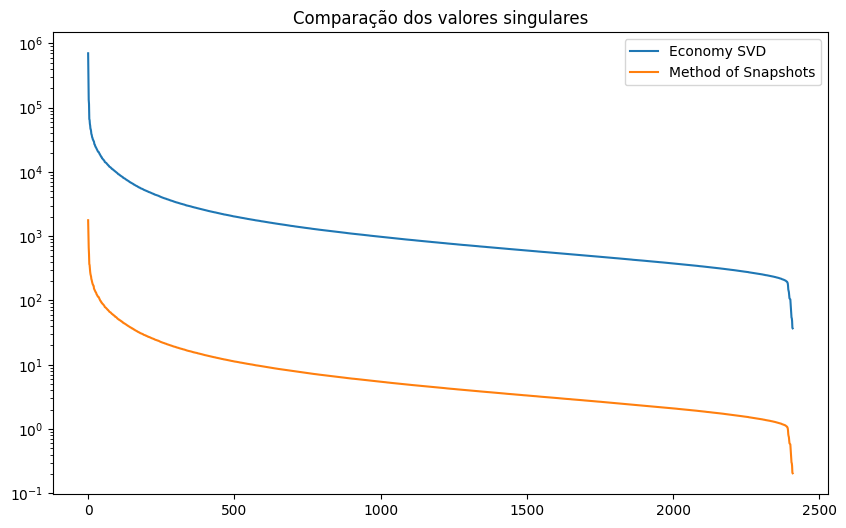

In [160]:
# comparando o espectro de valores singulares
plt.figure(figsize=(10, 6))
plt.semilogy(s_yale, label='Economy SVD')
plt.semilogy(s_yale_snap, label='Method of Snapshots')
plt.title('Comparação dos valores singulares')
plt.legend()
plt.show()

In [82]:
dim_x = yaleb['n'][0][0]
dim_y = yaleb['m'][0][0]
print(f'dimensões de cada rosto: {dim_x} x {dim_y}')

dimensões de cada rosto: 192 x 168


In [83]:
dim_x, dim_y

(np.uint8(192), np.uint8(168))

In [84]:
U_yale.shape

(32256, 2410)

Economy SVD


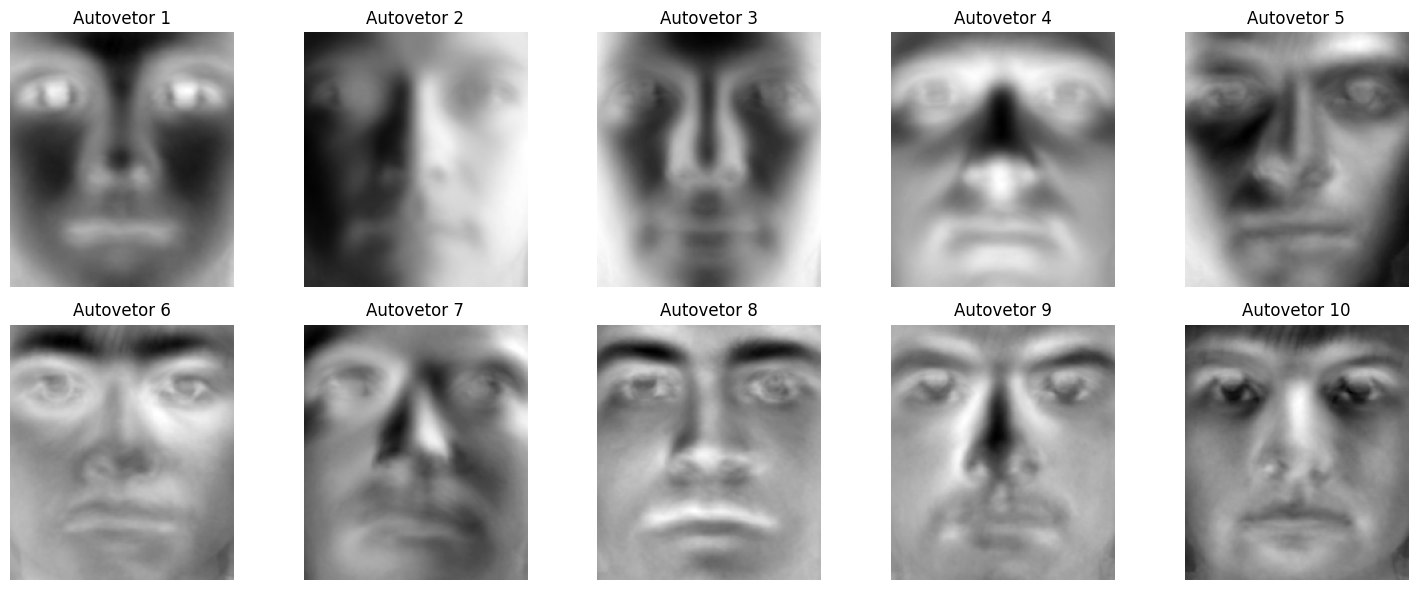

Method of Snapshots


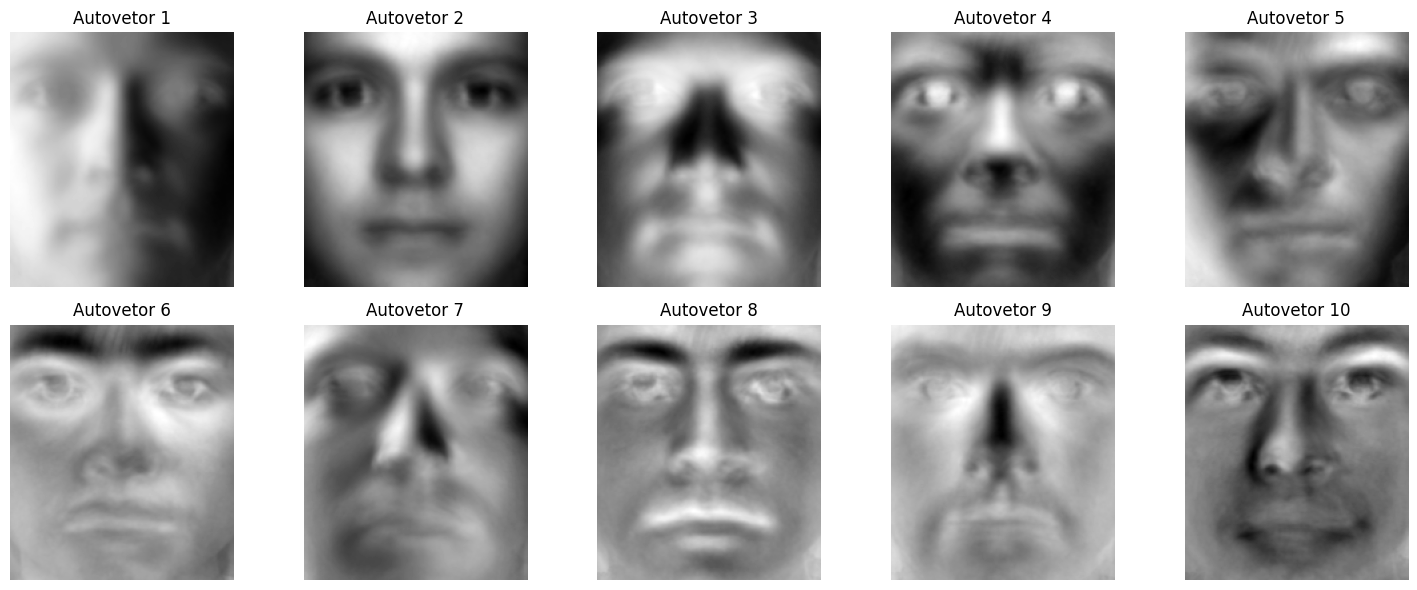

In [161]:
# plot dos primeiros 10 autovetores
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U_yale[:,i],(m,n)).T, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Autovetor {i + 1}')
plt.tight_layout()
print('Economy SVD')
plt.show()

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U_yale_snap[:,i],(m,n)).T, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Autovetor {i + 1}')
plt.tight_layout()
print('Method of Snapshots')
plt.show()

Como há 2410 autovetores, vamos pegar os autovetores [1000, 1010] como exemplo.

Economy SVD


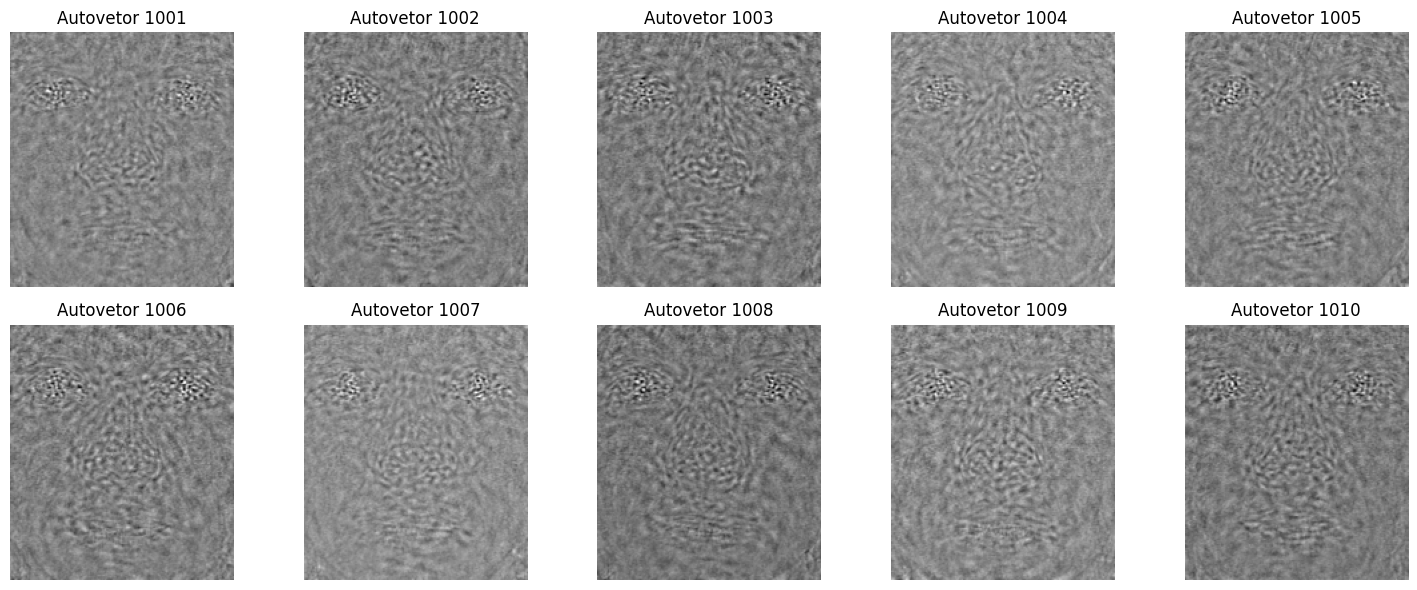

Method of Snapshots


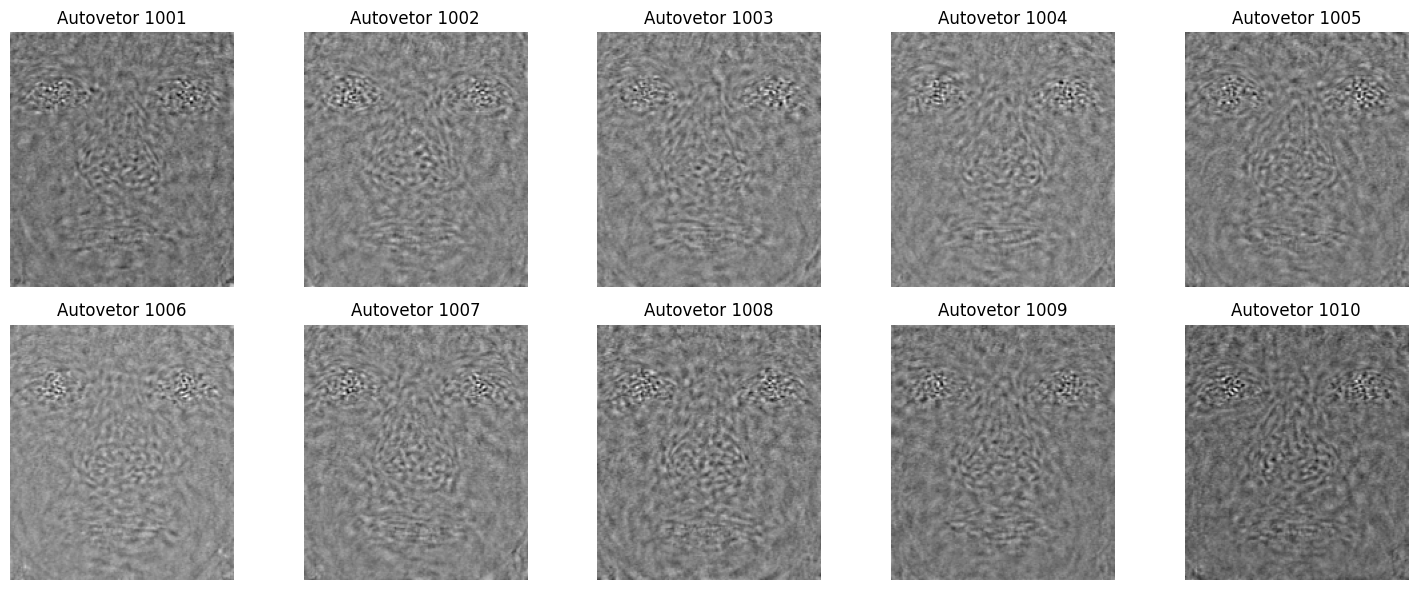

In [162]:
# plot dos autovetores [1000:1010]
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U_yale[:,i + 1000],(m,n)).T, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Autovetor {i + 1001}')
plt.tight_layout()
print('Economy SVD')
plt.show()

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U_yale_snap[:,i + 1000],(m,n)).T, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Autovetor {i + 1001}')
plt.tight_layout()
print('Method of Snapshots')
plt.show()

Verifiquemos então se a reconstrução volta na matriz original.

In [163]:
yale_snap_rebuild = U_yale_snap @ np.diag(s_yale_snap) @ Vh_yale_snap
yale_snap_rebuild.shape

(32256, 2410)

In [166]:
# reconstrução da matriz com SVD economy
print(np.allclose(yaleb_faces, U_yale @ np.diag(s_yale) @ Vh_yale))
# reconstrução da matriz com snapshots
print(np.allclose(yaleb_faces, yale_snap_rebuild))

True
True


Observamos que o método das snapshots produz autovalores e autovetores diferentes, porém igualmene capazes de reconstruir o problema original.

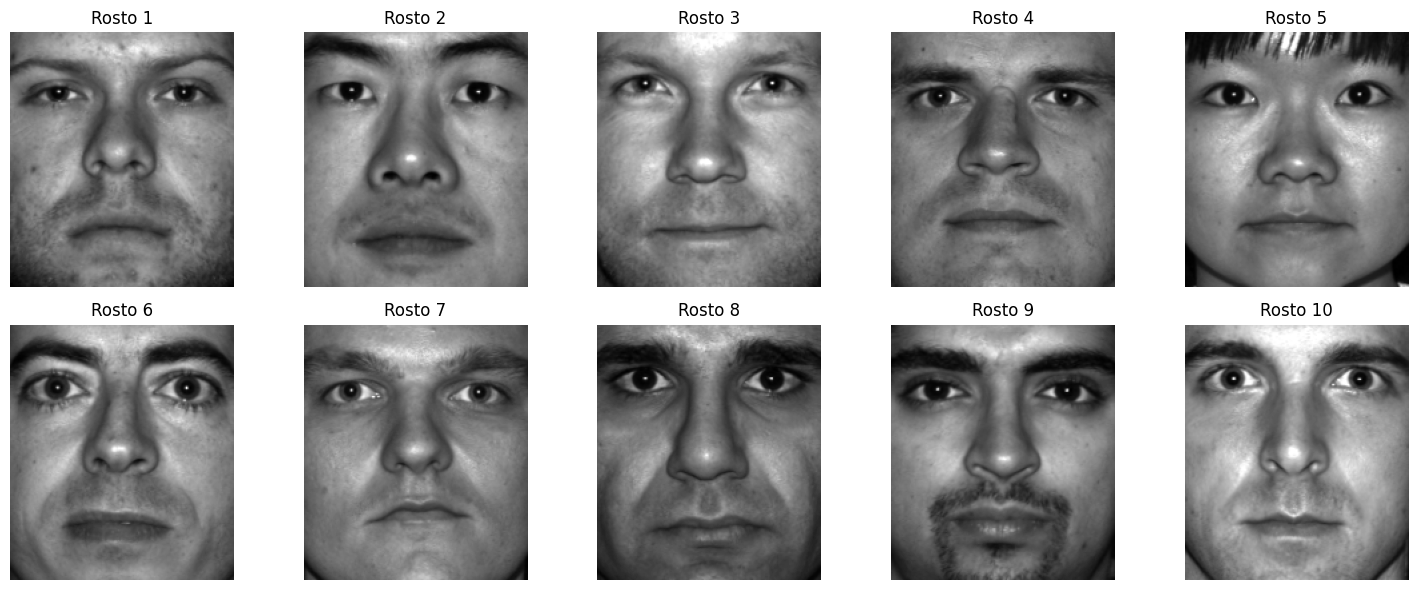

In [169]:
# plot dos primeiros 10 rostos
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flat):
    face = yale_snap_rebuild[:,np.sum(nfaces[:i])]
    ax.imshow(np.reshape(face,(m,n)).T, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Rosto {i + 1}')
plt.tight_layout()
plt.show()

##### Exercício 1.4
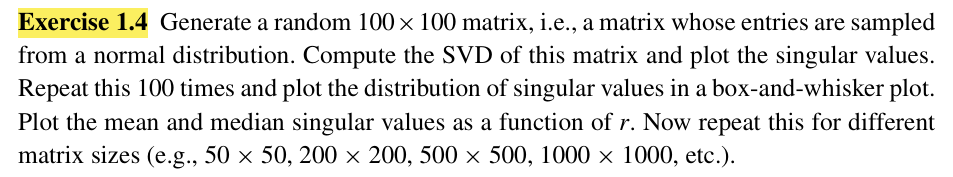

In [50]:
def random_n_matrix(n):
    return np.random.randn(n, n)

In [51]:
np.random.seed(6661)
init_randmat = random_n_matrix(100)

In [52]:
U_i, s_i, Vh_i = np.linalg.svd(init_randmat, full_matrices=True)

In [53]:
def plot_s(s):
    plt.figure(figsize=(5, 3))
    plt.semilogy(s)
    plt.title('Valores singulares')
    plt.show()

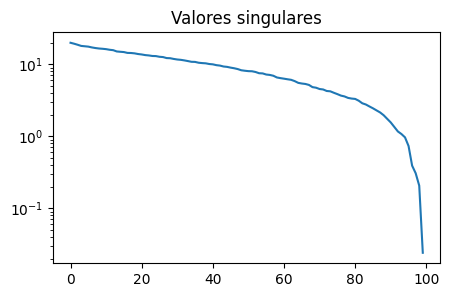

In [54]:
plot_s(s_i)

In [55]:
def plot_svals(n):
    svals_100 = []
    for _ in range(100):
        randmat = random_n_matrix(n)
        _, s, _ = np.linalg.svd(randmat, full_matrices=False)
        svals_100.append(s)
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=svals_100)
    plt.title('Valores singulares')
    plt.show()

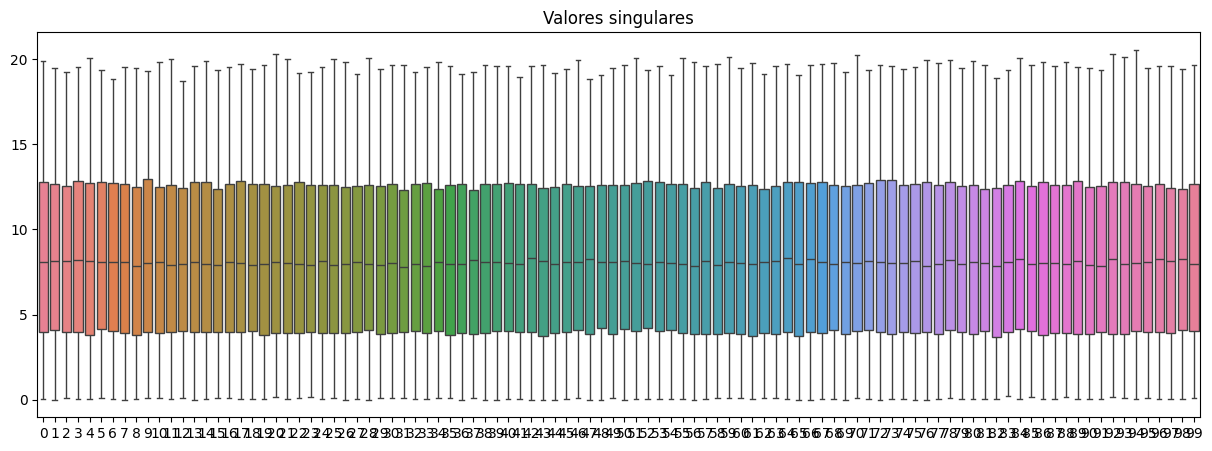

In [56]:
np.random.seed(6661)
plot_svals(100)

In [57]:
def mean_median_sv(s, r):
    mean_sv = np.mean(s[:r])
    median_sv = np.median(s[:r])
    return mean_sv, median_sv

In [58]:
def plot_mean_median(s):
    means_i = np.zeros(len(s))
    medians_i = np.zeros(len(s))
    for r_idx in range(len(s)):
        mean_sv, median_sv = mean_median_sv(s, r_idx)
        means_i[r_idx] = mean_sv
        medians_i[r_idx] = median_sv
    # plot
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, len(s) + 1), means_i, label='Média')
    plt.plot(range(1, len(s) + 1), medians_i, label='Mediana')
    plt.xlabel('r')
    plt.ylabel('Valor singular')
    plt.title('Média e mediana dos valores singulares')
    plt.legend()
    plt.show()

c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


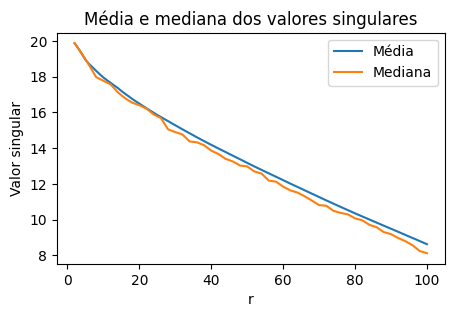

In [59]:
plot_mean_median(s_i)

n = 50


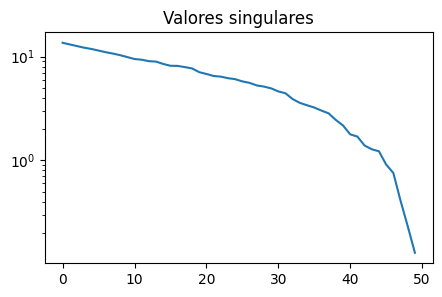

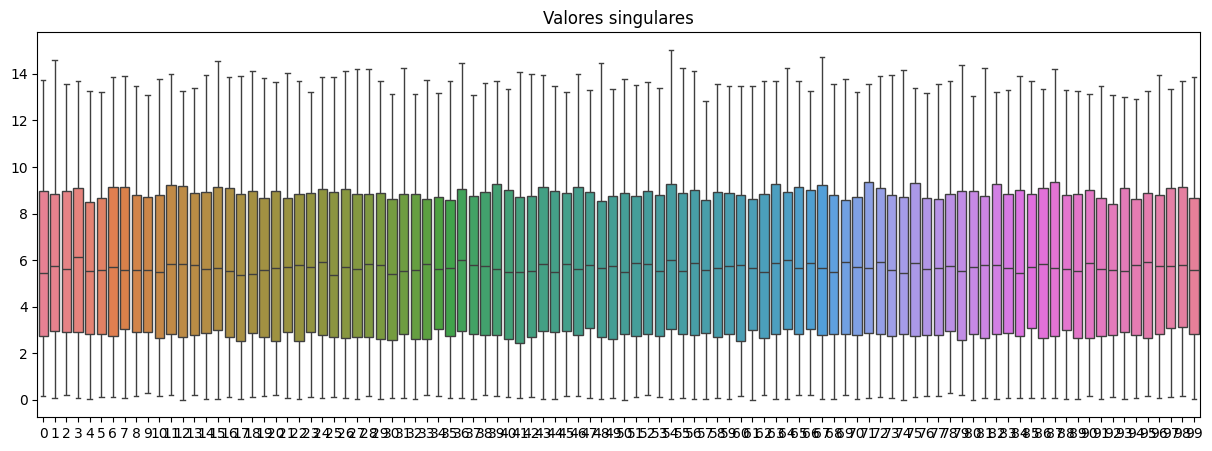

c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


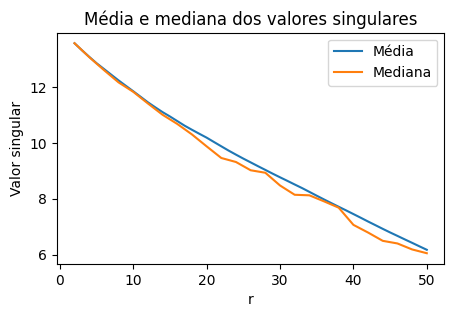

n = 200


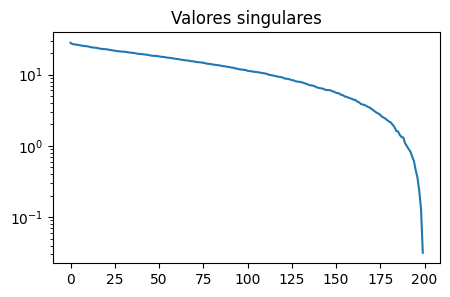

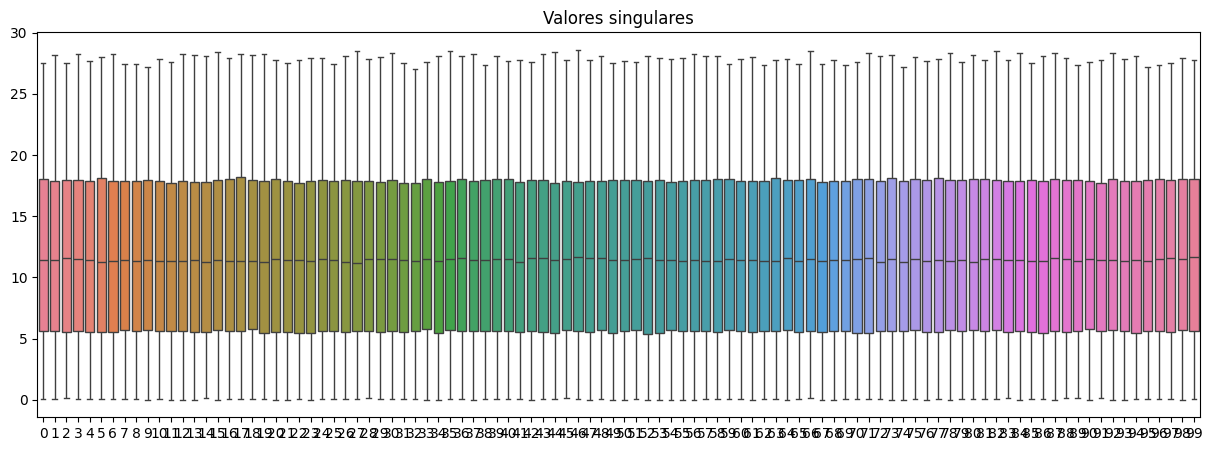

c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


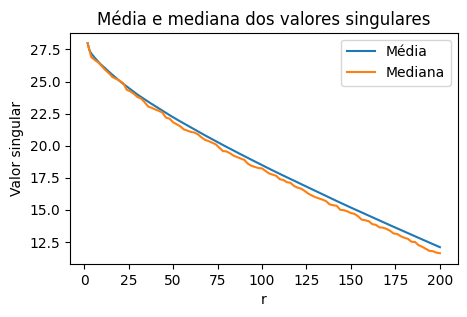

n = 500


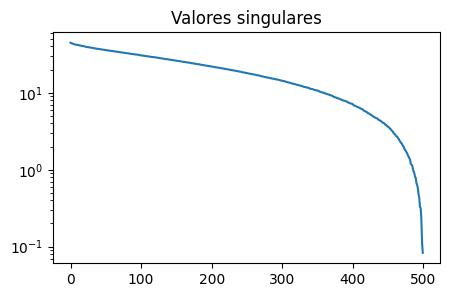

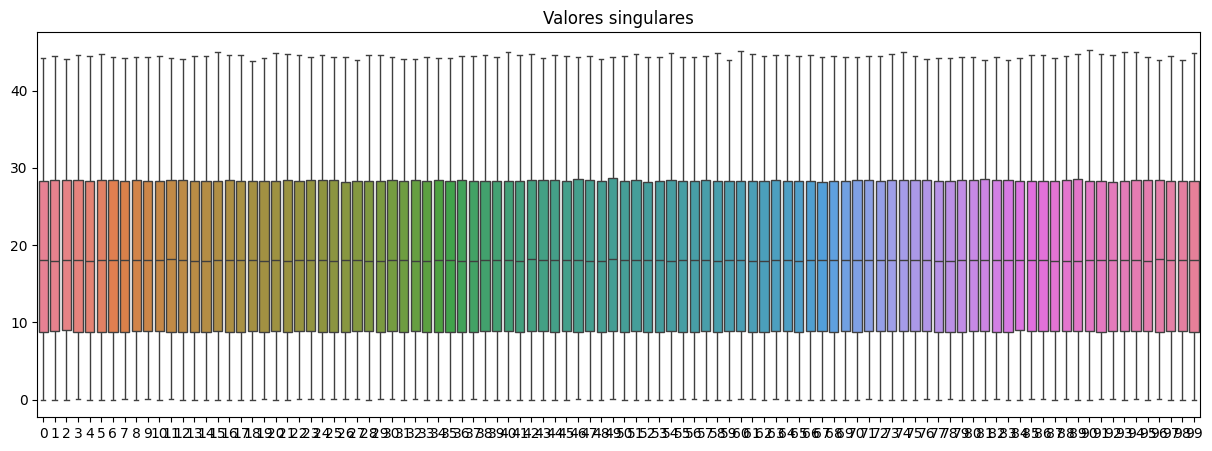

c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


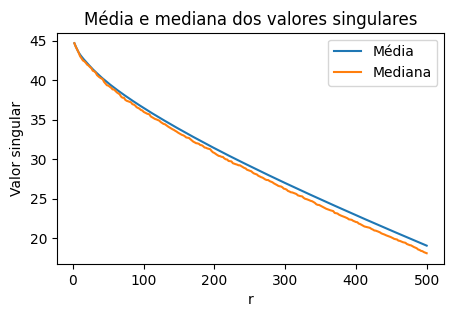

n = 1000


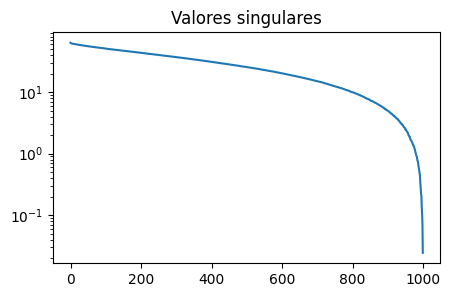

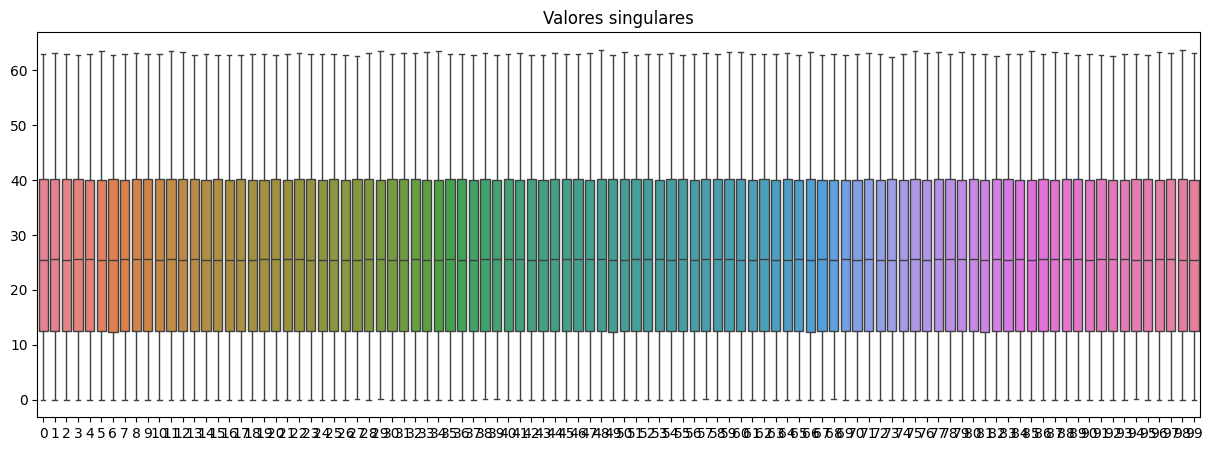

c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\danie\Documents\Unesp\ALCD\.venv\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


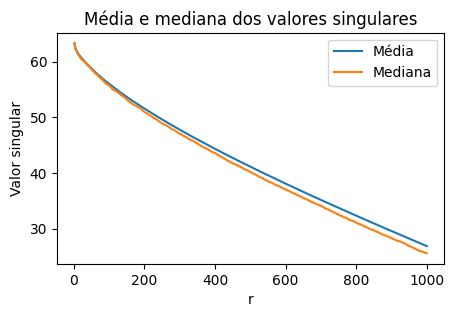

In [60]:
for n_val in [50, 200, 500, 1000]:
    print(f'n = {n_val}')
    np.random.seed(6661)
    init_randmat = random_n_matrix(n_val)
    U_i, s_i, Vh_i = np.linalg.svd(init_randmat, full_matrices=True)
    # plot s
    plot_s(s_i)
    # plot svals
    plot_svals(n_val)
    # plot mean and median
    plot_mean_median(s_i)